# Visualización de Datos

En esta guía rápida quiero mostrarles cómo graficar algunos datos en 3 dimensiones además de algunas herramientas extra que también creo que les van a resultar útiles.

En primer lugar, si vamos a trabajar con Jupyter Notebook nos va a convenir configurar la librería gráfica para este entorno. Esto se hace mediante uno de los llamados *comandos mágicos* que comienzan con un '%' y se pueden usar para alterar varios valores predeterminados. Esto va a permitir que al ejecutarlos puedan rotar y acercar los gráficos para poder apreciarlos mejor.

Después, además de las librerías que importamos siempre, vamos a tener que importar el módulo para *Ejes 3D*. Esto agrega algunos métodos y opciones a las herramientas gráficas que ya conocemos.

In [1]:
%matplotlib notebook

import numpy as num
from matplotlib import pyplot as mpl
from mpl_toolkits.mplot3d import Axes3D

Vamos a necesitar también algunos datos pertenecientes a **$R^3$** para graficar. Como siempre los generaremos al azar a partir de valores provenientes de una distribución normal y correlacionados mediante una matriz de mezcla. En este caso también vamos a encargarnos de normalizarlos.


In [2]:
P = 250
N = 3

In [3]:
num.random.seed(2339)
v = num.random.normal( 0, 1, (P,N))
m = num.random.uniform( -1, 1, (N,N))
c = num.dot( v, m)
data = (c - c.mean(axis=0)) / c.std()

Para poder verlos en tres dimensiones tengo que crear una figura que contenga un solo sub-plot, esto es necesario para indicar que se trata de una proyección en 3D.
Con solo esto puedo utilizar el mismo comando *plot* de siempre, ahora con la posibilidad de incluir los valores del *eje z* como tercer parámetro. 

En esta figura también estoy incluyendo, en forma de vectores, los pesos de dos modelos distintos que fueron entrenados uno con la regla de Oja (en rojo) y otro con la de Sanger (en verde).
Esto es para aprovechar que tenemos datos con 3 variables de entrada y que podemos comparar los resultados a los que llegaron los modelos con solo 2 unidades de salida. Se puede apreciar el mediante Sanger los pesos quedan claramente alineados con las primeras 2 componentes principales, mientras que con Oja obtenemos pesos ortogonales que, aunque no indican claramente la dirección de estas componentes, pueden ser utilizados para generar el mismo sub-espacio, en este caso, un plano.

También quiero hacer notar que todo fue graficado con el mismo método *plot*. La diferencia está en el cuarto parámetro de formato, en donde con una letra ( **b**lue, **r**ed, **g**reen) le indico el color, y con un *punto* o un *menos* le indico si los valores están conectados entre sí.

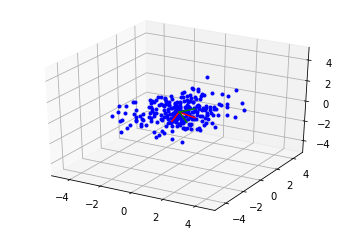

In [4]:
fig = mpl.figure()
xyz = fig.add_subplot(111, projection='3d')
xyz.set_xlim( -5, 5)
xyz.set_ylim( -5, 5)
xyz.set_zlim( -5, 5)
xyz.plot( data[:,0], data[:,1], data[:,2], 'b.')
xyz.plot( [0,0.06], [0,-0.9], [0,-0.42], 'r-')   # Oja
xyz.plot( [0,0.85], [0,0.27], [0,-0.44], 'r-')
xyz.plot( [0,0.5], [0,0.86],  [0,0.04], 'g-')    # Sanger
xyz.plot( [0,0.7], [0,-0.37], [0,-0.6], 'g-')
mpl.show()


Finalmente quiero mostrarles otra forma de graficar estas nubes de puntos, pero utilizando distintos colores para distintos cúmulos de datos.

Primero deberemos generar tres conjuntos de datos distintos cuya varianza y posición también cambiaremos al azar. En este caso vamos a reservar una cuarta variable de entrada, además de las primeras 3 reservadas para la posición, que indicará a que cúmulo pertenecía originalmente cada instancia.

Y esto es necesario porque vamos a combinar a los 3 cúmulos en un solo conjunto de datos mediantes el método **vstack** que permite *apilar* verticalmente varias matrices, y después vamos a mezclarlos al azar con el método **shuffle**.


In [5]:
c1 = num.random.normal( 0, 1, (100,4)) * num.random.uniform(-1,1, (1,4)) + num.random.uniform(-1,1, (1,4))
c2 = num.random.normal( 0, 1, (100,4)) * num.random.uniform(-1,1, (1,4)) + num.random.uniform(-1,1, (1,4))
c3 = num.random.normal( 0, 1, (100,4)) * num.random.uniform(-1,1, (1,4)) + num.random.uniform(-1,1, (1,4))

c1[:,-1] = 1
c2[:,-1] = 2
c3[:,-1] = 3

data = num.vstack((c1, c2, c3))
num.random.shuffle( data)

print(data)

[[-0.29446341 -0.59743977 -0.97523392  1.        ]
 [ 1.46011845 -1.11705841 -1.73560683  2.        ]
 [-2.26565134  0.25448463 -0.28198891  1.        ]
 ...
 [-0.73156287  0.06417457 -0.4079612   1.        ]
 [ 0.25560408  0.36099891 -0.99741099  3.        ]
 [ 0.11771347 -0.24601225 -1.14988796  2.        ]]


Para poder visualizarlos debemos crear una figura con una proyección 3d como en el caso anterior. Pero esta vez vamos a usar el método **scatter3D**, al que le podremos pasar en los primeros tres parámetros las coordenadas espaciales de los datos, y un parámetro adicional '**c**' con las etiquetas de los cúmulos originales y que servirá para asignarle automáticamente distintos colores a los puntos del gráfico.

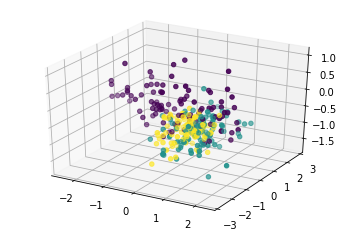

In [6]:
fig = mpl.figure()
xyz = fig.add_subplot( 111, projection='3d')
xyz.scatter3D( data[:,0], data[:,1], data[:,2], c=data[:,3])
fig.show()